# Overfitting demo
## Create a dataset based on true sinusoidal relationship
##### Let's loot at a synthetic dataset consisting of 30 points drawn from the sinusoid y = sin(4X):

In [27]:
import graphlab
import math
import random
import numpy
from matplotlib import pyplot as plt
%matplotlib inline

Create random values for x in interval[0,1)

In [28]:
random.seed(98103)
n=30
x = graphlab.SArray([random.random() for i in range(n)]).sort()

In [29]:
#y = x.apply(lambda x:math.sin(4*x))
y = graphlab.SArray([math.sin(4*i) for i in x])

Apply random Gaussian noise to y

In [30]:
random.seed(1)
e = graphlab.SArray([random.gauss(0,1.0/3.0) for i in range(n)])
y = y+e

In [31]:
data = graphlab.SFrame({'X1':x,'Y':y})

In [32]:
data

X1,Y
0.0395789449501,0.587050191026
0.0415680996791,0.648655851372
0.0724319480801,0.307803309485
0.150289044622,0.310748447417
0.161334144502,0.237409625496
0.191956312795,0.705017157224
0.232833917145,0.461716676992
0.259900980166,0.383260507851
0.380145814869,1.06517691429
0.432444723508,1.03184706949


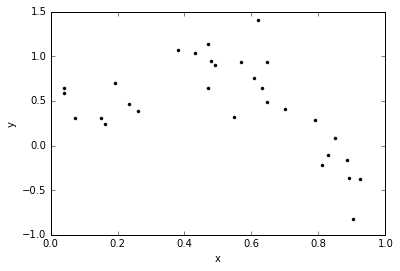

In [33]:
def plot_data(data):
    plt.plot(data['X1'],data['Y'],'k.')
    plt.xlabel('x')
    plt.ylabel('y')
plot_data(data)

# Define some useful polynomial regression functions

*** Define a function to create out features for a polynomial regression model of any degree ***

In [34]:
def polynomial_features(data,deg):
    data_copy = data.copy()
    for i in range(1,deg):
        data_copy['X'+str(i+1)]=data_copy['X'+str(i)]*data_copy['X1']
    return data_copy

In [35]:
def polynomial_regression(data, deg):
    model = graphlab.linear_regression.create(polynomial_features(data,deg),
                                      target='Y',l2_penalty=0.,l1_penalty=0.,
                                      validation_set=None,verbose=False)
    return model

Define function to plot data and predictions made, since we are going to use it many times

In [36]:
def plot_poly_predictions(data,model):
    plot_data(data)
    
    # Get the degree of the polynomial
    deg = len(model.coefficients['value'])-1
    
    # Create 200 points in the x axis and compute the predicted
    # value for each point
    x_pred = graphlab.SFrame({'X1':[i/200.0 for i in range(200)]})
    y_pred = model.predict(polynomial_features(x_pred,deg))
    
    # plot predictions
    plt.plot(x_pred['X1'],y_pred,'g-',label='degree '+str(deg)+'fit')
    plt.legend(loc='upper left')
    plt.axis([0,1,-1.5,2])

Create a function that prints the polynomial coefficients in a prettyway :)

In [37]:
def print_coefficients(model):
    deg = len(model.coefficients['value'])-1
    
    #Get learned parameters as a list
    w = list(model.coefficients['value'])
    
    # Numpy has a nifty function to print out polynomials in a pretty way
    # (We'll) use it, but it needs the parameters in the reverse order)
    print 'Learned polynomial for degree '+str(deg)+':'
    w.reverse()
    print numpy.poly1d(w)

# Fit a degree-2 polynomial

Fit out degree-2 polynomil to the data generated above

In [38]:
model = polynomial_regression(data,deg=2)

Inspect learned parameters

In [39]:
print_coefficients(model)

Learned polynomial for degree 2:
        2
-5.129 x + 4.147 x + 0.07471


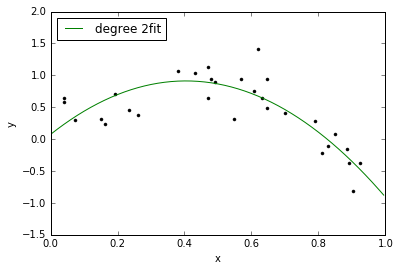

In [40]:
plot_poly_predictions(data,model)

# Fit a degree-4 polynomial

Learned polynomial for degree 4:
       4         3         2
23.87 x - 53.82 x + 35.23 x - 6.828 x + 0.7755


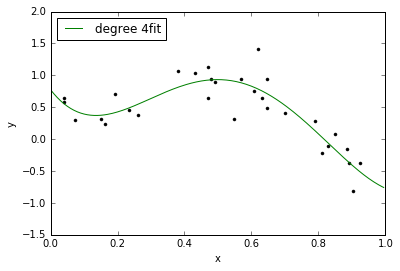

In [41]:
model = polynomial_regression(data,4)
print_coefficients(model)
plot_poly_predictions(data,model)

# Fit a degree-16 polynomial

Learned polynomial for degree 16:
            16             15             14            13
-4.537e+05 x  + 1.129e+06 x  + 4.821e+05 x  - 3.81e+06 x 
              12             11             10             9
 + 3.536e+06 x  + 5.753e+04 x  - 1.796e+06 x  + 2.178e+06 x
              8             7            6             5             4
 - 3.662e+06 x + 4.442e+06 x - 3.13e+06 x + 1.317e+06 x - 3.356e+05 x
             3        2
 + 5.06e+04 x - 4183 x + 160.8 x - 1.621


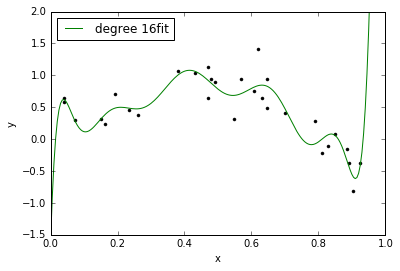

In [42]:
model = polynomial_regression(data,16)
print_coefficients(model)
plot_poly_predictions(data,model)

# Ridge Regression

In [58]:
def polynomial_ridge_regression(data,deg,l2_penalty):
    model = graphlab.linear_regression.create(polynomial_features(data,deg),
                                             target='Y',l2_penalty=l2_penalty,
                                             validation_set=None,verbose=False)
    return model

# Perform a ridge fit of a degree-16 polynomial using a very small penalty strength

In [59]:
model = polynomial_ridge_regression(data,deg=16,l2_penalty=1e-25)

In [60]:
print_coefficients(model)

Learned polynomial for degree 16:
            16             15             14            13
-4.537e+05 x  + 1.129e+06 x  + 4.821e+05 x  - 3.81e+06 x 
              12             11             10             9
 + 3.536e+06 x  + 5.753e+04 x  - 1.796e+06 x  + 2.178e+06 x
              8             7            6             5             4
 - 3.662e+06 x + 4.442e+06 x - 3.13e+06 x + 1.317e+06 x - 3.356e+05 x
             3        2
 + 5.06e+04 x - 4183 x + 160.8 x - 1.621


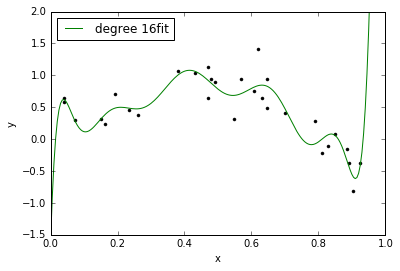

In [61]:
plot_poly_predictions(data,model)

# Perform a ridge fit of a degree-16 polynomial using a very large penalty strength

In [62]:
model = polynomial_ridge_regression(data,deg=16,l2_penalty=100)
print_coefficients(model)

Learned polynomial for degree 16:
        16          15          14          13          12         11
-0.301 x  - 0.2802 x  - 0.2604 x  - 0.2413 x  - 0.2229 x  - 0.205 x 
           10          9          8          7          6           5
 - 0.1874 x  - 0.1699 x - 0.1524 x - 0.1344 x - 0.1156 x - 0.09534 x
            4           3           2
 - 0.07304 x - 0.04842 x - 0.02284 x - 0.002257 x + 0.6416


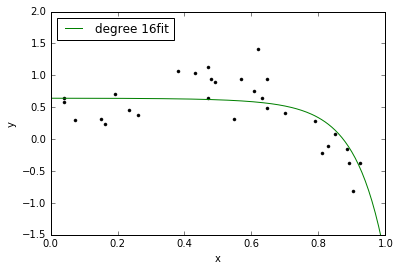

In [64]:
plot_poly_predictions(data,model)

# Let's look at fits for a sequence of increasing lambda values

lambda = 1.00e-25
Learned polynomial for degree 16:
            16             15             14            13
-4.537e+05 x  + 1.129e+06 x  + 4.821e+05 x  - 3.81e+06 x 
              12             11             10             9
 + 3.536e+06 x  + 5.753e+04 x  - 1.796e+06 x  + 2.178e+06 x
              8             7            6             5             4
 - 3.662e+06 x + 4.442e+06 x - 3.13e+06 x + 1.317e+06 x - 3.356e+05 x
             3        2
 + 5.06e+04 x - 4183 x + 160.8 x - 1.621


lambda = 1.00e-10
Learned polynomial for degree 16:
           16             15             14             13
4.975e+04 x  - 7.821e+04 x  - 2.265e+04 x  + 3.949e+04 x 
              12        11             10             9             8
 + 4.366e+04 x  + 3074 x  - 3.332e+04 x  - 2.786e+04 x + 1.032e+04 x
              7        6             5             4        3         2
 + 2.962e+04 x - 1440 x - 2.597e+04 x + 1.839e+04 x - 5596 x + 866.1 x - 65.19 x + 2.159


lambda = 1.00e-05
Learned polyn

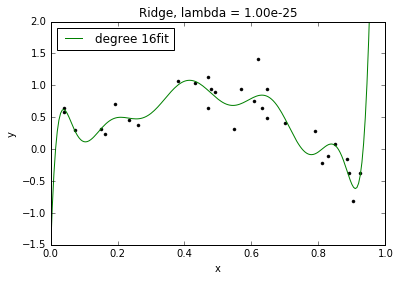

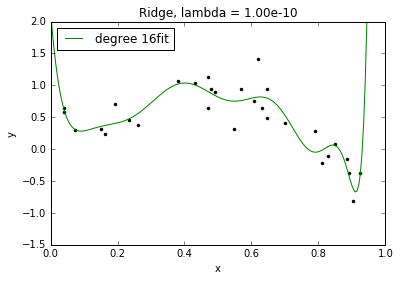

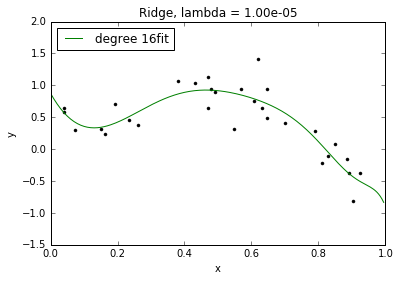

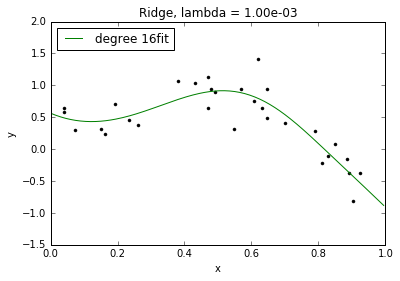

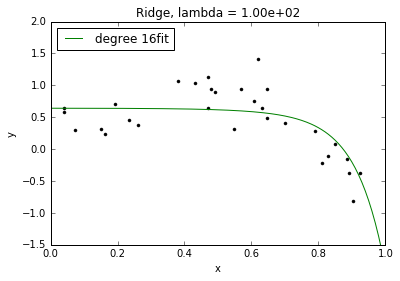

In [65]:
for l2_penalty in [1e-25,1e-10,1e-5,1e-3,1e2]:
    model = polynomial_ridge_regression(data,deg=16,l2_penalty=l2_penalty)
    print 'lambda = %.2e' % l2_penalty
    print_coefficients(model)
    print '\n'
    plt.figure()
    plot_poly_predictions(data,model)
    plt.title('Ridge, lambda = %.2e' %l2_penalty)